# Diabetes Database || Linear Regression

I will try to predict whether a patient has diabetes or not using Linear Regression. I have a previous notebook on EDA and data preprocessing so I won't go into much details in this notebook. 

Previous notebook: https://www.kaggle.com/code/azratuni/diabetes-database-eda

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.simplefilter("ignore")

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
df = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')

In [3]:
print((df[df.columns] == 0).sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [4]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [5]:
df['Glucose'].fillna(df['Glucose'].median(), inplace =True)

df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace =True)

df['BMI'].fillna(df['BMI'].median(), inplace =True)

In [6]:
by_Glucose_Age_Insulin_Grp = df.groupby(['Glucose'])

def fill_Insulin(series):
    return series.fillna(series.median())
df['Insulin'] = by_Glucose_Age_Insulin_Grp['Insulin'].transform(fill_Insulin)

In [7]:
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())

In [8]:
by_BMI_Insulin = df.groupby(['BMI'])

def fill_Skinthickness(series):
    return series.fillna(series.mean())
df['SkinThickness'] = by_BMI_Insulin['SkinThickness'].transform(fill_Skinthickness)

In [9]:
df['SkinThickness'].fillna(df['SkinThickness'].mean(),inplace= True)

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
x = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [13]:
y = df[['Outcome']]

In [14]:
from sklearn.model_selection import train_test_split


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)


In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
print(model.coef_)


[[ 0.01975456  0.00702524 -0.0004374  -0.00281216 -0.00022962  0.01594471
   0.11192827  0.00170581]]


In [17]:
print(model.intercept_)


[-1.06290518]


In [18]:
predictions = model.predict(x_test)


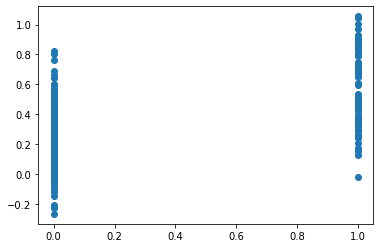

In [19]:
plt.scatter(y_test, predictions)


(array([ 6., 16., 39., 52., 40., 24., 12., 23., 15.,  4.]),
 array([-0.82055976, -0.6363695 , -0.45217925, -0.26798899, -0.08379873,
         0.10039153,  0.28458179,  0.46877204,  0.6529623 ,  0.83715256,
         1.02134282]),
 <BarContainer object of 10 artists>)

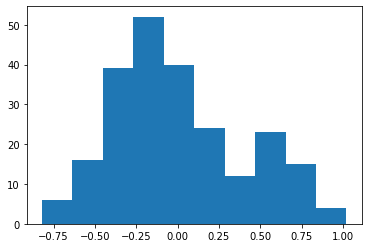

In [20]:
plt.hist(y_test - predictions)

# Mean Absolute Error (MAE)

In [21]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, predictions)


0.3204813953420487

# Mean Squared Error (MSE)

In [22]:
metrics.mean_squared_error(y_test, predictions)


0.15352734233237866